Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

Data Preprocessing

In [2]:
# load the dataset to pandas Data Frame
raw_mail_data = pd.read_csv('spamham.csv')
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [4]:
mail_data.shape

(5572, 2)

In [5]:
mail_data.head() #sample data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# label spam mail as 0; Non-spam mail (ham) mail as 1.
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [7]:
# separate the data as text and label. X --> text; Y --> label
X = mail_data['Message']
Y = mail_data['Category']

In [8]:
print(X)
print('.............')
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
.............
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Train Test Split

In [9]:
# split the data as train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=3, stratify = Y)

Feature Extraction

In [12]:
# transform the text data to feature vectors that can be used as input to the SVM model using TfidfVectorizer
# convert the text to lower case letters
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

Training the model --> **Support Vector Machine**

In [13]:
# training the support vector machine model with training data
model = LinearSVC()
model.fit(X_train_features, Y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Evaluation of the model

In [14]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [15]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9997756338344178


In [16]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [17]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9874439461883409


Prediction on new mail

In [18]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

#making prediction
prediction = model.predict(input_mail_features)
print(prediction)

if (prediction[0]==1):
  print('HAM MAIL')
else:
  print('SPAM MAIL')

[1]
HAM MAIL


Training the model -> **KNN**

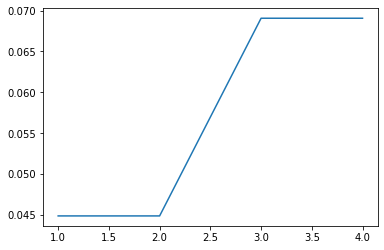

In [34]:
# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

def Elbow(k):
    test_error = []
    
    for i in k:
        clf = KNeighborsClassifier(n_neighbors = i)
        clf.fit(X_train_features,Y_train)
        tmp = clf.predict(X_test_features)
        tmp = accuracy_score(Y_test,tmp)
        error = 1-tmp
        test_error.append(error)
        
    return test_error

k = range(1,5)
test = Elbow(k)

import matplotlib.pyplot as plt
plt.plot(k,test)
plt.show()



In [35]:
# instantiate learning model (k = 2)
knn = KNeighborsClassifier(n_neighbors=2)

# Train the Classifier/fitting the model
knn.fit(X_train_features, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

Evaluation of the model

In [36]:
# prediction on training data
prediction_on_training_data = knn.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

# prediction on test data
prediction_on_test_data = knn.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on training data :  0.9997756338344178
Accuracy on test data :  0.9551569506726457


Prediction on new mail

In [37]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]
# convert text to feature vectors
input_mail_features = feature_extraction.transform(input_mail)

#making prediction
prediction = knn.predict(input_mail_features)
print(prediction)

if (prediction[0]==1):
  print('HAM MAIL')
else:
  print('SPAM MAIL')

[1]
HAM MAIL
